In [54]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

In [55]:
df = pd.read_csv('../0.Datasets/processed/processed_car_data.csv').iloc[:1000,:]
# df = pd.read_csv('../0.Datasets/processed/sliced_car_data.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [56]:
df['good_buy'] = np.where((df['mmr'] > df['sellingprice']) & (df['condition'] >= 20 ) & (df['odometer'] <= 400000),'no', 'yes')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date,good_buy
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00,yes
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00,yes
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00,no
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00,yes
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00,yes


In [57]:
x = df[['condition', 'odometer','mmr', 'sellingprice']]
x.head()

,condition,odometer,mmr,sellingprice
0,5.0,16639.0,20500.0,21500.0
1,5.0,9393.0,20800.0,21500.0
2,45.0,1331.0,31900.0,30000.0
3,41.0,14282.0,27500.0,27750.0
4,43.0,2641.0,66000.0,67000.0


In [58]:
y = df['good_buy']
y.head()

0    yes
1    yes
2     no
3    yes
4    yes
Name: good_buy, dtype: object

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state= 0)

In [60]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
rf = RandomForestClassifier(n_jobs= -1)
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1)

In [62]:
y_predict = rf.predict(x_test)
# y_predict

c:\Users\AjayPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [63]:
# print(np.array(y_test))

In [64]:
print(accuracy_score(y_test, y_predict))

0.66


In [65]:
print(classification_report(y_test, y_predict, zero_division=1))

              precision    recall  f1-score   support

          no       1.00      0.00      0.00       102
         yes       0.66      1.00      0.80       198

    accuracy                           0.66       300
   macro avg       0.83      0.50      0.40       300
weighted avg       0.78      0.66      0.52       300



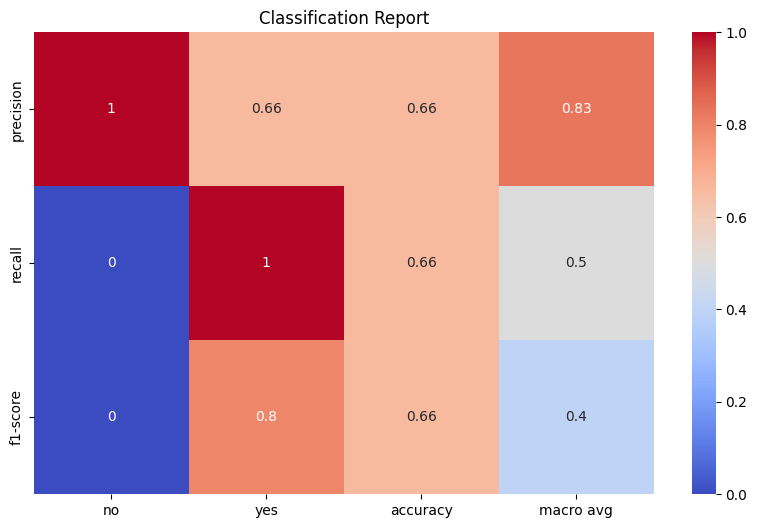

In [66]:
report = classification_report(y_test, y_predict,zero_division=1, output_dict= True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

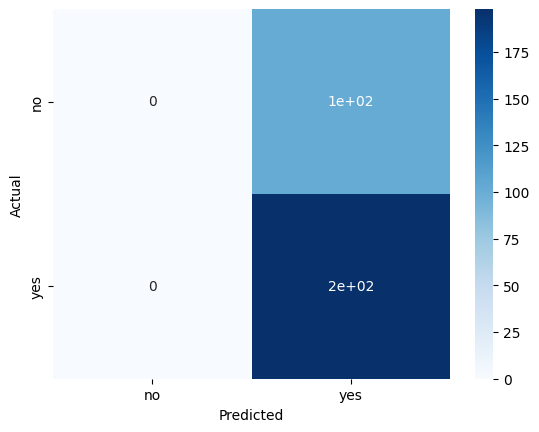

In [67]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, cmap='Blues',
             xticklabels=rf.classes_, yticklabels=rf.classes_)

plt.xlabel('Predicted')

plt.ylabel('Actual')
plt.title("confusion matrix")

plt.show()

In [68]:
#  hyperparameter tuning for Random Forest using GridSearchCV and fit the data.

In [69]:
rf = RandomForestClassifier(random_state= 0, n_jobs= -1)

params = {
    
    
    'n_estimators':[10, 20, 30, 50, 100, 200],
    'criterion':['gini','entropy', 'log_loss'],
    'max_depth':[10,20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features': [ 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

In [70]:
grid_search = GridSearchCV(estimator=rf, 
                           param_grid= params,
                            cv=4,
                            n_jobs=-1,
                            verbose=1,
                            scoring= "accuracy")

start_time = time.time()

grid_search.fit(x_train,y_train)

end_time = time.time()

print(f'execution time : {end_time - start_time} seconds')


Fitting 4 folds for each of 1944 candidates, totalling 7776 fits
execution time : 810.4099736213684 seconds


In [71]:
grid_search.best_score_

0.8257142857142857

In [72]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [73]:
y_predict = grid_search.predict(x_test)


<Axes: >

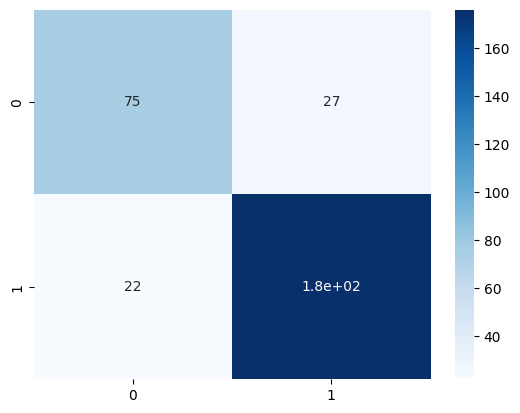

In [74]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot =True, cmap ='Blues')

In [75]:
print(accuracy_score(y_test, y_predict))

0.8366666666666667


In [76]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=50,
                       n_jobs=-1, random_state=0)

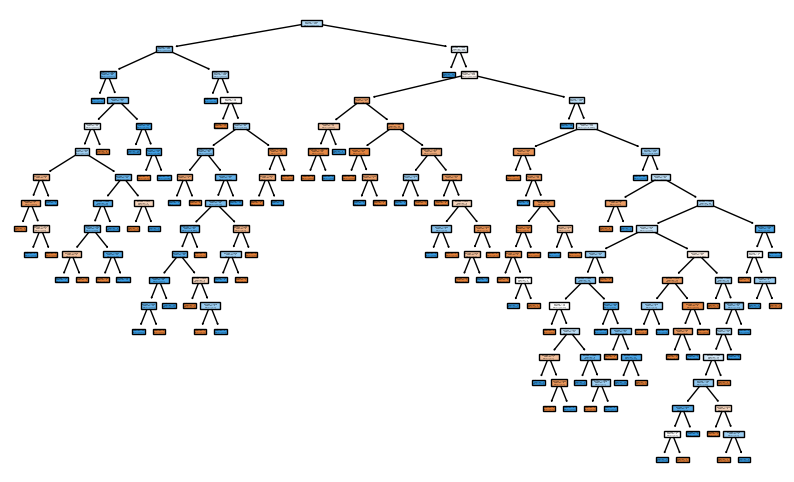

In [77]:

plt.figure(figsize=(10,6))
plot_tree(rf_best.estimators_[5], feature_names=x.columns, filled=True)
plt.savefig('./Graph/1.best_estimator_5.png')
plt.show()

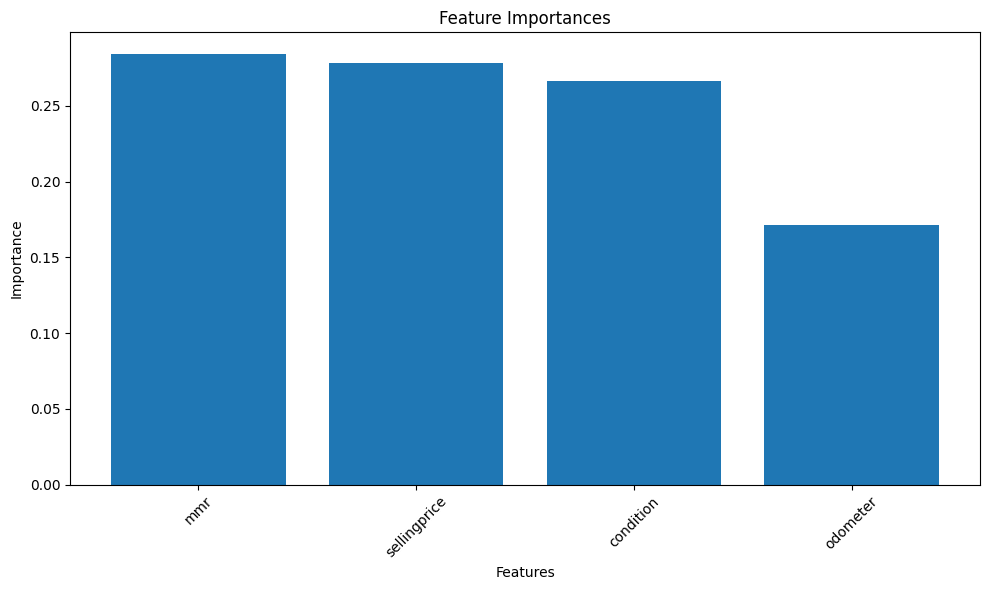

In [78]:
feature_importances = rf_best.feature_importances_
features = x.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")


plt.xticks(range(x.shape[1]), features[indices], rotation=45)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")

plt.tight_layout()
plt.savefig('./Graph/1.IMP_Features.png')
plt.show()
